In [1]:
# Libraries used.

# Frequent itemsets + association rules
library(arules);

# Python-like fstrings.
library(glue);

# library(dplyr);


# Plots.
library(ggplot2);

# B-splines for 'ggplot' smooth plots. 
library(splines);


Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write




In [2]:
# Helper functions.

m  = function(x) print(methods(class=class(x)))
p  = function(x) print(glue(x))
ph = function(x) print(head(x))
pt = function(x) print(tail(x))
pc = function(x) print(class(x))

In [3]:
# WARNING - disk size of data file is about 5.4GB, and after reading it into RAM
# R process uses about 6.4GB of memory.
DATA_FNAME = "MINI_TRIMMED.csv" # "clash_royale_games_Jan_2019.csv"
library(data.table)
data = fread(DATA_FNAME)


Warning message in fread(DATA_FNAME):
“Detected 3 column names but the data has 9 columns (i.e. invalid file). Added 6 extra default column names at the end.”


In [4]:
# Sort games by timestamp.
data = data[order(data$timestamp, decreasing=FALSE)]
data_len = length(data$timestamp)
data_begin_day = format(data$timestamp[[1]], '%d-%m-%Y')
data_end_day = format(data$timestamp[[data_len]], '%d-%m-%Y')

p("Our dataset contains results of {data_len} games played from {data_begin_day} up to {data_end_day}.")


Our dataset contains results of 10000 games played from 31-12-2018 up to 02-01-2019.


In [5]:
# Read transactions.
transactions = arules::read.transactions(DATA_FNAME, format="basket", head=1, sep=',', cols=1)

In [6]:
# For each game we introduce two transactions - one for each players (single transaction contains set of cards from one player's deck).
inspect(head(transactions, n=1))
inspect(tail(transactions, n=1))

    items                     transactionID
[1] {elixir-collector,                     
     golem,                                
     mega-knight,                          
     mega-minion,                          
     night-witch,                          
     rage,                                 
     witch,                                
     zap}              2018-12-31T23:00:46Z
    items                     transactionID
[1] {bats,                                 
     elixir-collector,                     
     goblin-gang,                          
     golem,                                
     mega-minion,                          
     royal-ghost,                          
     wizard,                               
     zap}              2019-01-02T21:22:54Z


In [7]:
minSupport = 0.01

# Generate frequent itemsets (using arules::Apriori implementation). 
frequentItemSets = apriori(transactions, 
                           parameter = list(supp = minSupport, 
                                            minlen = 1, 
                                            target = "frequent itemsets"),
                           appearance = NULL, control = list(verbose = FALSE))

# frequentItemSets = eclat(transactions, parameter = list(supp = minSupport, 
#                                                         minlen = 2, 
#                                                         target = "frequent itemsets",
#                                                         tidLists = FALSE),
#                               control = list(verbose = FALSE))

In [8]:
# n_sets(x) returns list of frequent itemsets of size 'x', sorted decreasing by support value.
n_sets = function(frequent_itemsets, n) arules::sort(frequent_itemsets[which(size(frequent_itemsets) == n)], decreasing=TRUE)


In [9]:
# Look for single most-popular cards (Overall time).
a = n_sets(frequentItemSets, 1)
inspect(head(a))
l = labels(a[1])
s = support(a[1], transactions)
p("Here is the list of most popular cards (overall). The most popular card, the {l} was used in {100 * s}% of all decks!")


    items         support transIdenticalToItemsets count
[1] {zap}         0.4319  0                        4319 
[2] {fireball}    0.3424  0                        3424 
[3] {the-log}     0.3255  0                        3255 
[4] {hog-rider}   0.2816  0                        2816 
[5] {goblin-gang} 0.2715  0                        2715 
[6] {wizard}      0.2269  0                        2269 
Here is the list of most popular cards (overall). The most popular card, the {zap} was used in 43.19% of all decks!


In [13]:
chunk2 <- function(x,n) split(x, cut(seq_along(x), n, labels = FALSE)) 

bins = 10
s = chunk2(transactions, bins)
a = lapply(s, function(x) transactionInfo(x)[[1]][[1]])

head(a)

$`1`
[1] "2018-12-31T23:00:46Z"

$`2`
[1] "2019-01-01T09:06:44Z"

$`3`
[1] "2019-01-01T17:45:19Z"

$`4`
[1] "2019-01-01T22:57:41Z"

$`5`
[1] "2019-01-02T04:31:00Z"

$`6`
[1] "2019-01-02T09:58:14Z"

In [20]:
transactionInfo(transactions)$transactionID # - min(transactionInfo(transactions)$transactionID)

[1] "2018-12-31T23:00:46Z" "2018-12-31T23:01:34Z" "2018-12-31T23:02:00Z"
    [4] "2018-12-31T23:02:00Z" "2018-12-31T23:02:02Z" "2018-12-31T23:02:21Z"
    [7] "2018-12-31T23:03:12Z" "2018-12-31T23:03:42Z" "2018-12-31T23:04:20Z"
   [10] "2018-12-31T23:04:47Z" "2018-12-31T23:04:50Z" "2018-12-31T23:06:04Z"
   [13] "2018-12-31T23:06:36Z" "2018-12-31T23:07:28Z" "2018-12-31T23:07:44Z"
   [16] "2018-12-31T23:07:51Z" "2018-12-31T23:07:59Z" "2018-12-31T23:08:49Z"
   [19] "2018-12-31T23:08:58Z" "2018-12-31T23:09:18Z" "2018-12-31T23:10:44Z"
   [22] "2018-12-31T23:10:46Z" "2018-12-31T23:12:01Z" "2018-12-31T23:12:04Z"
   [25] "2018-12-31T23:12:20Z" "2018-12-31T23:12:39Z" "2018-12-31T23:14:18Z"
   [28] "2018-12-31T23:15:01Z" "2018-12-31T23:15:02Z" "2018-12-31T23:15:42Z"
   [31] "2018-12-31T23:15:43Z" "2018-12-31T23:16:26Z" "2018-12-31T23:16:26Z"
   [34] "2018-12-31T23:16:54Z" "2018-12-31T23:17:27Z" "2018-12-31T23:17:58Z"
   [37] "2018-12-31T23:19:16Z" "2018-12-31T23:19:34Z" "2018-12-31T23:19:37Z"
   [40] "2018-12-31T23:19:37Z" "2018-12-31T23:20:43Z" "2018-12-31T23:20:58Z"
   [43] "2018-12-31T23:21:02Z" "2018-12-31T23:21:09Z" "2018-12-31T23:21:38Z"
   [46] "2018-12-31T23:21:49Z" "2018-12-31T23:22:02Z" "2018-12-31T23:22:49Z"
   [49] "2018-12-31T23:22:50Z" "2018-12-31T23:22:57Z" "2018-12-31T23:24:19Z"
   [52] "2018-12-31T23:25:32Z" "2018-12-31T23:25:36Z" "2018-12-31T23:25:42Z"
   [55] "2018-12-31T23:26:02Z" "2018-12-31T23:26:12Z" "2018-12-31T23:26:20Z"
   [58] "2018-12-31T23:27:28Z" "2018-12-31T23:27:33Z" "2018-12-31T23:27:35Z"
   [61] "2018-12-31T23:28:11Z" "2018-12-31T23:29:38Z" "2018-12-31T23:29:47Z"
   [64] "2018-12-31T23:30:54Z" "2018-12-31T23:31:23Z" "2018-12-31T23:31:52Z"
   [67] "2018-12-31T23:32:35Z" "2018-12-31T23:33:06Z" "2018-12-31T23:33:11Z"
   [70] "2018-12-31T23:33:31Z" "2018-12-31T23:35:46Z" "2018-12-31T23:35:57Z"
   [73] "2018-12-31T23:36:20Z" "2018-12-31T23:36:33Z" "2018-12-31T23:36:41Z"
   [76] "2018-12-31T23:36:43Z" "2018-12-31T23:36:55Z" "2018-12-31T23:37:18Z"
   [79] "2018-12-31T23:38:44Z" "2018-12-31T23:40:05Z" "2018-12-31T23:40:07Z"
   [82] "2018-12-31T23:41:21Z" "2018-12-31T23:41:34Z" "2018-12-31T23:42:02Z"
   [85] "2018-12-31T23:42:04Z" "2018-12-31T23:43:00Z" "2018-12-31T23:43:19Z"
   [88] "2018-12-31T23:44:40Z" "2018-12-31T23:44:59Z" "2018-12-31T23:45:27Z"
   [91] "2018-12-31T23:45:42Z" "2018-12-31T23:46:44Z" "2018-12-31T23:47:55Z"
   [94] "2018-12-31T23:49:38Z" "2018-12-31T23:50:01Z" "2018-12-31T23:51:33Z"
   [97] "2018-12-31T23:51:57Z" "2018-12-31T23:52:08Z" "2018-12-31T23:52:13Z"
  [100] "2018-12-31T23:52:33Z" "2018-12-31T23:53:38Z" "2018-12-31T23:55:16Z"
  [103] "2018-12-31T23:56:08Z" "2018-12-31T23:57:27Z" "2018-12-31T23:58:43Z"
  [106] "2018-12-31T23:59:46Z" "2018-12-31T23:59:58Z" "2019-01-01T00:00:21Z"
  [109] "2019-01-01T00:01:33Z" "2019-01-01T00:01:55Z" "2019-01-01T00:02:34Z"
  [112] "2019-01-01T00:02:36Z" "2019-01-01T00:05:43Z" "2019-01-01T00:06:29Z"
  [115] "2019-01-01T00:06:34Z" "2019-01-01T00:06:57Z" "2019-01-01T00:07:18Z"
  [118] "2019-01-01T00:07:26Z" "2019-01-01T00:10:34Z" "2019-01-01T00:11:21Z"
  [121] "2019-01-01T00:12:35Z" "2019-01-01T00:12:50Z" "2019-01-01T00:12:51Z"
  [124] "2019-01-01T00:13:26Z" "2019-01-01T00:13:42Z" "2019-01-01T00:14:51Z"
  [127] "2019-01-01T00:15:37Z" "2019-01-01T00:15:46Z" "2019-01-01T00:16:38Z"
  [130] "2019-01-01T00:16:39Z" "2019-01-01T00:17:26Z" "2019-01-01T00:18:06Z"
  [133] "2019-01-01T00:18:12Z" "2019-01-01T00:18:58Z" "2019-01-01T00:19:02Z"
  [136] "2019-01-01T00:19:11Z" "2019-01-01T00:20:01Z" "2019-01-01T00:20:02Z"
  [139] "2019-01-01T00:20:40Z" "2019-01-01T00:21:04Z" "2019-01-01T00:21:35Z"
  [142] "2019-01-01T00:21:52Z" "2019-01-01T00:22:15Z" "2019-01-01T00:22:21Z"
  [145] "2019-01-01T00:22:35Z" "2019-01-01T00:22:59Z" "2019-01-01T00:23:14Z"
  [148] "2019-01-01T00:23:33Z" "2019-01-01T00:24:21Z" "2019-01-01T00:24:29Z"
  [151] "2019-01-01T00:25:09Z" "2019-01-01T00:25:41Z" "2019-01-01T00:25:47Z"
  [154] "2019-01-01T00:26:15Z" "2019-01-01T00:26:38Z" "2019-01-01T00:27:14Z"


In [12]:
# What about card popularity in time? Let's investigate splitted by consecutive few-day chunks data.

# https://stackoverflow.com/a/16275428
# chunk2 <- function(x,n) split(x, cut(seq_along(x), n, labels = FALSE)) 

# bins = 10
split_groups = popular_in_time$chunk_start_date - min(popular_in_time$chunk_start_date)
s = split(transactions, split_groups)
print(s)
print(popular_in_time$chunk_start_date)

x_axis = lapply(s, function(x) transactionInfo(x)[[1]][[1]])
x_axis = lapply(x_axis, as.Date, format="%Y-%m-%dT%H:%M:%S")

res = data.frame()
popular_cards = c()
for (v in 1:length(s)) {
    f = apriori(s[[v]], 
                parameter = list(supp = minSupport, 
                                minlen = 1, 
                                maxlen = 1,
                                target = "frequent itemsets"),
                appearance = NULL, control = list(verbose = FALSE))
    f = DATAFRAME(n_sets(f, 1))
    f$chunk = v
    f$chunk_start_date = x_axis[[v]]
    # print(head(f))
    popular_cards = c(popular_cards, as.character(f$items[1:4]))
    res = rbind(res, f)
}
popular_cards = as(popular_cards, "matrix")
popular_in_time = dplyr::filter(res, items %in% popular_cards)


ERROR: Error in eval(expr, envir, enclos): object 'popular_in_time' not found


In [ ]:
# head(popular_in_time, n=20)
popular_in_time$chunk_start_date - min(popular_in_time$chunk_start_date)
# tail(split_date, n=50)
# x_axis[[1]]
# x_axis = lapply(x_axis, as.Date, format="%Y-%m-%dT%H:%M:%S")

Time differences in days
 [1] 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

[1] "2018-12-31" "2018-12-31" "2018-12-31" "2018-12-31" "2018-12-31"
 [6] "2018-12-31" "2019-01-01" "2019-01-01" "2019-01-01" "2019-01-01"
[11] "2019-01-01" "2019-01-01" "2019-01-01" "2019-01-01" "2019-01-01"
[16] "2019-01-01" "2019-01-01" "2019-01-01" "2019-01-01" "2019-01-01"
[21] "2019-01-01" "2019-01-01" "2019-01-01" "2019-01-01" "2019-01-02"
[26] "2019-01-02" "2019-01-02" "2019-01-02" "2019-01-02" "2019-01-02"
[31] "2019-01-02" "2019-01-02" "2019-01-02" "2019-01-02" "2019-01-02"
[36] "2019-01-02" "2019-01-02" "2019-01-02" "2019-01-02" "2019-01-02"
[41] "2019-01-02" "2019-01-02" "2019-01-02" "2019-01-02" "2019-01-02"
[46] "2019-01-02" "2019-01-02" "2019-01-02" "2019-01-02" "2019-01-02"
[51] "2019-01-02" "2019-01-02" "2019-01-02" "2019-01-02" "2019-01-02"
[56] "2019-01-02" "2019-01-02" "2019-01-02" "2019-01-02" "2019-01-02"

Popularity of 6 most frequently used cards in time.


Warning message:
“Ignoring unknown parameters: width”
`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 17896”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 2.01”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  6.6486e-17”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 1.0201”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“pseudoinverse used at 17896”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(obje

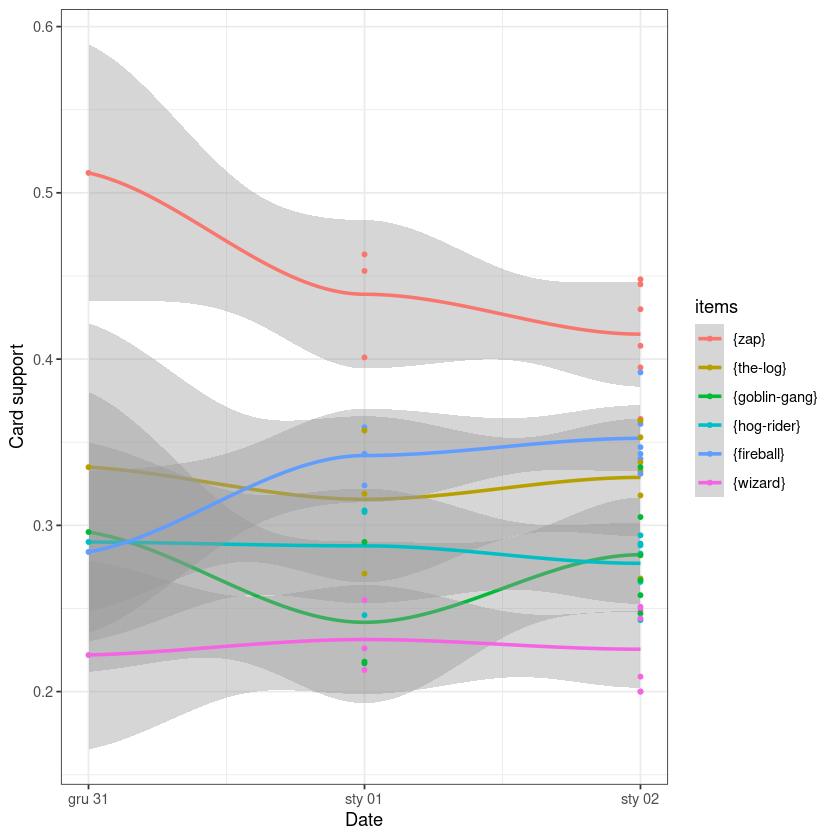

In [ ]:
p("Popularity of {length(unique(popular_cards))} most frequently used cards in time.")
gg = ggplot(popular_in_time, aes(x=chunk_start_date, y=support, colour=items))
# gg = gg + stat_smooth(aes(x = chunk_start_date, y = support, colour=items), method = "lm", fullrange=TRUE, formula = y ~ ns(x, min(bins - 1, 10)), se = FALSE)
gg = gg + geom_smooth() # aes(x = chunk_start_date, y = support, colour=items), method="lm", formula = y ~ ns(x, 9))
gg = gg + geom_point(width = .5, size=1)
gg = gg + xlab("Date") + ylab("Card support")
# gg = gg + theme(legend.position = "none")
plot(gg)

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 15 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 15 rows containing missing values (geom_point).”


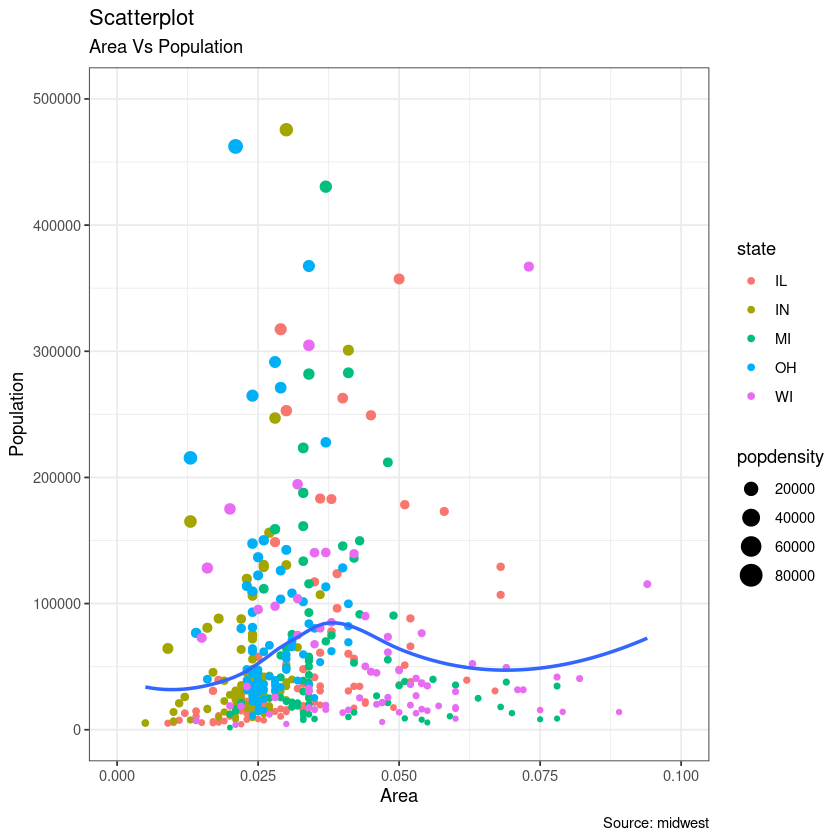

In [ ]:
options(scipen=999)  # turn-off scientific notation like 1e+48
library(ggplot2)
theme_set(theme_bw())  # pre-set the bw theme.
data("midwest", package = "ggplot2")
# midwest <- read.csv("http://goo.gl/G1K41K")  # bkup data source

# Scatterplot
gg <- ggplot(midwest, aes(x=area, y=poptotal)) + 
  geom_point(aes(col=state, size=popdensity)) + 
  geom_smooth(method="loess", se=F) + 
  xlim(c(0, 0.1)) + 
  ylim(c(0, 500000)) + 
  labs(subtitle="Area Vs Population", 
       y="Population", 
       x="Area", 
       title="Scatterplot", 
       caption = "Source: midwest")

plot(gg)